In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/content/tested.csv")

In [3]:
print(df.head(10))

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   
6          898         1       3   
7          899         0       2   
8          900         1       3   
9          901         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                    Svensson, Mr. Johan Cervin    male  14.0      0      0   
6                          Connolly, Miss. Kate  f

In [4]:
print(df.shape)

(418, 12)


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [6]:
print(df['Survived'].value_counts())

0    266
1    152
Name: Survived, dtype: int64


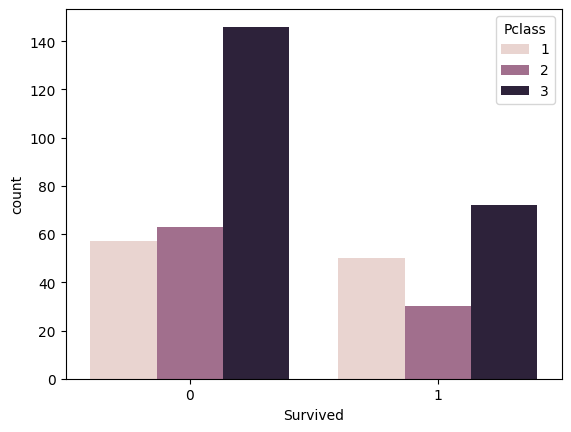

In [7]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])
plt.show()

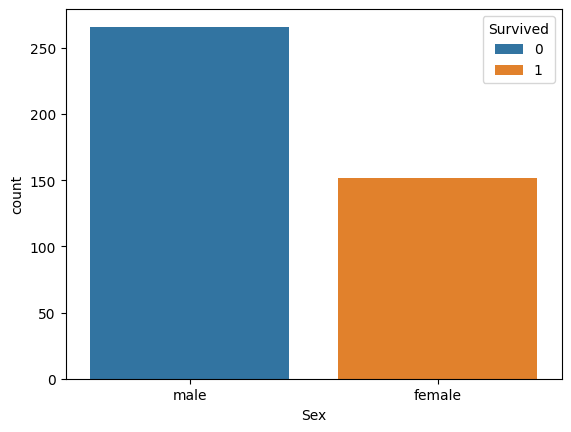

In [8]:
sns.countplot(x=df['Sex'], hue=df['Survived'])
plt.show()

In [9]:
print(df.groupby('Sex')[['Survived']].mean())

        Survived
Sex             
female       1.0
male         0.0


In [10]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [11]:
df = df.drop(['Age'], axis=1)

In [12]:
X = df[['Pclass', 'Sex']]
Y = df['Survived']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
rf_classifier = RandomForestClassifier(random_state=0)

In [15]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [16]:
predictions = rf_classifier.predict(X_test)
print(predictions)


[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [17]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


In [18]:
res = rf_classifier.predict([[2, 0]])
if res == 0:
    print("Not Survived")
else:
    print("Survived")

Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
